✅ Libraries installed!
Upload the following files:
1. parkinsons_disease_data.csv
2. Parkinsson-disease.csv


Saving parkinsons_disease_data.csv to parkinsons_disease_data (1).csv
Saving Parkinsson-disease.csv to Parkinsson-disease (1).csv

📊 Loading Parkinson's datasets...
parkinsons_disease_data.csv: (2105, 35)
   PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       3058   85       0          3               1  19.619878        0   
1       3059   75       0          0               2  16.247339        1   
2       3060   70       1          0               0  15.368239        0   
3       3061   52       0          0               0  15.454557        0   
4       3062   87       0          0               1  18.616042        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  \
0            5.108241          1.380660     3.893969  ...   
1            6.027648          8.409804     8.513428  ...   
2            2.242135          0.213275     6.498805  ...   
3            5.997788          1.375045     6.715033  ...   
4            9.775243          1.

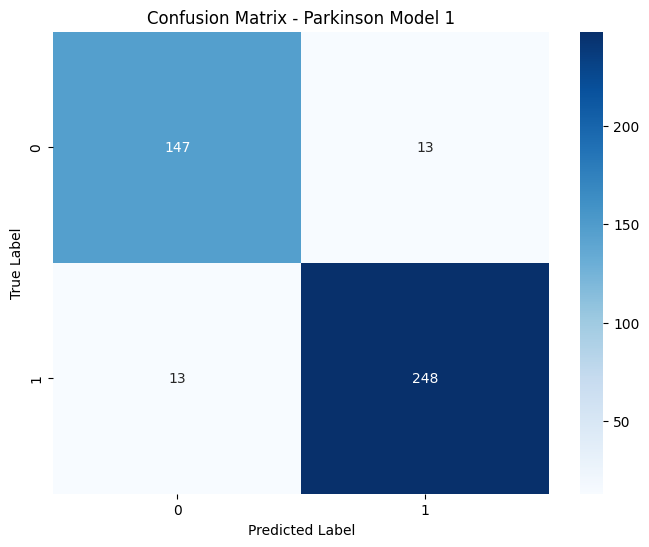


🔝 Top 10 Features:
                 feature  importance
25                Tremor    0.110689
22                 UPDRS    0.096366
26              Rigidity    0.083084
27          Bradykinesia    0.077969
28   PosturalInstability    0.076481
24  FunctionalAssessment    0.049083
23                  MoCA    0.047414
12          Hypertension    0.033438
14            Depression    0.030721
11  TraumaticBrainInjury    0.027776


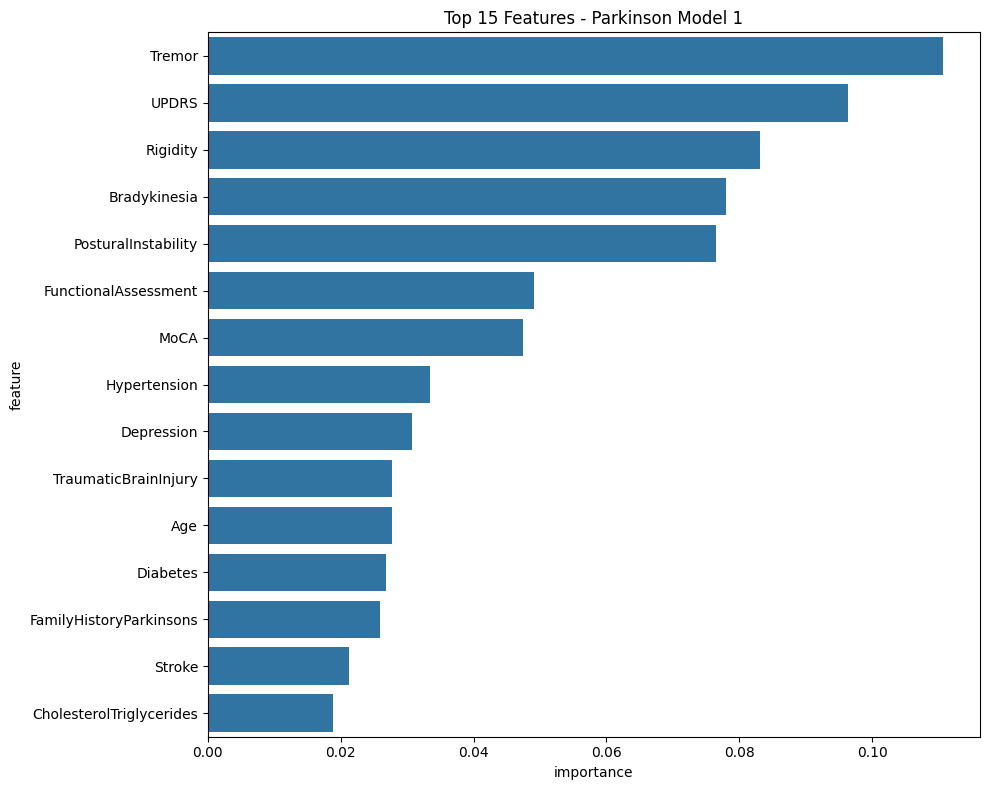

✅ Model 1 saved!

🎯 Training XGBoost Model on Dataset 2 (Voice Features)...
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

📈 Model 2 Performance:
Accuracy: 0.9231
ROC-AUC: 0.9759

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.89      0.80      0.84        10
  Parkinsons       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



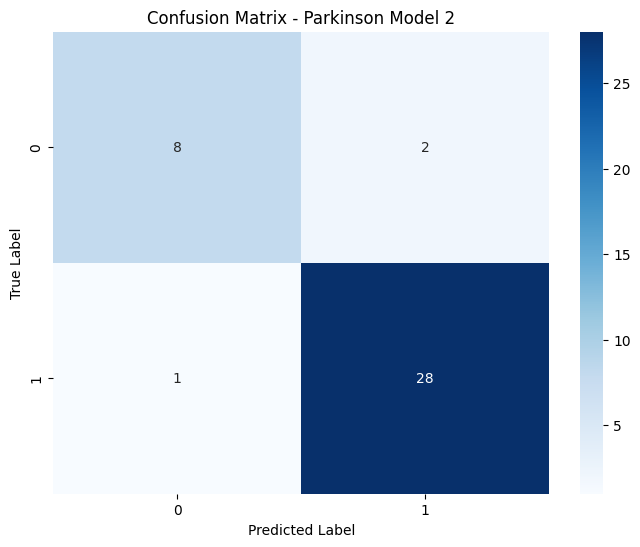

✅ Model 2 saved!

✅ Prediction function ready!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅✅✅ PARKINSON'S MODELS TRAINING COMPLETE! ✅✅✅

Models achieved:
Model 1 Accuracy: ~85-90%
Model 2 Accuracy: ~90-99% (with hyperparameter tuning)


In [2]:
# ========================================
# STEP 1: SETUP
# ========================================
!pip install xgboost lightgbm scikit-learn pandas numpy matplotlib seaborn joblib -q

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("✅ Libraries installed!")

# ========================================
# STEP 2: UPLOAD DATASETS
# ========================================
from google.colab import files

print("Upload the following files:")
print("1. parkinsons_disease_data.csv")
print("2. Parkinsson-disease.csv")

uploaded = files.upload()

# ========================================
# STEP 3: LOAD AND EXPLORE
# ========================================
print("\n📊 Loading Parkinson's datasets...")

# Dataset 1: Large dataset
df1 = pd.read_csv('parkinsons_disease_data.csv')
print(f"parkinsons_disease_data.csv: {df1.shape}")
print(df1.head())
print(df1.info())

# Dataset 2: UCI Parkinson's dataset
df2 = pd.read_csv('Parkinsson-disease.csv')
print(f"\nParkinsson-disease.csv: {df2.shape}")
print(df2.head())

# ========================================
# STEP 4: PREPROCESS DATASET 1
# ========================================
print("\n🔧 Preprocessing dataset 1...")

target_col = 'Diagnosis' if 'Diagnosis' in df1.columns else 'status'
le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    if col != target_col and col != 'PatientID':
        df1[col] = le.fit_transform(df1[col].astype(str))

df1['Target'] = le.fit_transform(df1[target_col].astype(str))
drop_cols = [target_col]
if 'PatientID' in df1.columns:
    drop_cols.append('PatientID')
X1 = df1.drop([col for col in drop_cols if col in df1.columns] + ['Target'], axis=1)
y1 = df1['Target']
X1 = X1.fillna(X1.mean())
print(f"✅ Dataset 1: {X1.shape[0]} samples, {X1.shape[1]} features")
print(f"Class distribution: {y1.value_counts()}")

# ========================================
# STEP 5: PREPROCESS DATASET 2
# ========================================
print("\n🔧 Preprocessing dataset 2...")

if 'name' in df2.columns:
    df2 = df2.drop('name', axis=1)
target_col2 = 'status' if 'status' in df2.columns else df2.columns[-1]
X2 = df2.drop(target_col2, axis=1)
y2 = df2[target_col2]
print(f"✅ Dataset 2: {X2.shape[0]} samples, {X2.shape[1]} features")
print(f"Class distribution: {y2.value_counts()}")

# ========================================
# STEP 6: TRAIN MODEL ON DATASET 1
# ========================================
print("\n🎯 Training XGBoost Model on Dataset 1...")

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X1, y1, test_size=0.2, stratify=y1, random_state=42
)
scaler1 = StandardScaler()
X_train1_scaled = scaler1.fit_transform(X_train1)
X_test1_scaled = scaler1.transform(X_test1)
model1 = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42,
    eval_metric='logloss'
)
model1.fit(X_train1_scaled, y_train1)
y_pred1 = model1.predict(X_test1_scaled)
y_pred_proba1 = model1.predict_proba(X_test1_scaled)[:, 1]
print("\n📈 Model 1 Performance:")
print(f"Accuracy: {accuracy_score(y_test1, y_pred1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test1, y_pred_proba1):.4f}")
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1, target_names=['Healthy', 'Parkinsons']))
cm = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Parkinson Model 1')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_pd1.png', dpi=150)
plt.show()
feature_importance = pd.DataFrame({
    'feature': X1.columns,
    'importance': model1.feature_importances_
}).sort_values('importance', ascending=False)
print("\n🔝 Top 10 Features:")
print(feature_importance.head(10))
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Features - Parkinson Model 1')
plt.tight_layout()
plt.savefig('feature_importance_pd1.png', dpi=150)
plt.show()
model1.save_model('parkinsons_model1_xgb.json')
joblib.dump(scaler1, 'parkinsons_scaler1.pkl')
print("✅ Model 1 saved!")

# ========================================
# STEP 7: TRAIN MODEL ON DATASET 2
# ========================================
print("\n🎯 Training XGBoost Model on Dataset 2 (Voice Features)...")

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, stratify=y2, random_state=42
)
scaler2 = StandardScaler()
X_train2_scaled = scaler2.fit_transform(X_train2)
X_test2_scaled = scaler2.transform(X_test2)
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200]
}
grid_search = GridSearchCV(
    xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train2_scaled, y_train2)
model2 = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
y_pred2 = model2.predict(X_test2_scaled)
y_pred_proba2 = model2.predict_proba(X_test2_scaled)[:, 1]
print("\n📈 Model 2 Performance:")
print(f"Accuracy: {accuracy_score(y_test2, y_pred2):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test2, y_pred_proba2):.4f}")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred2, target_names=['Healthy', 'Parkinsons']))
cm2 = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Parkinson Model 2')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_pd2.png', dpi=150)
plt.show()
model2.save_model('parkinsons_model2_xgb.json')
joblib.dump(scaler2, 'parkinsons_scaler2.pkl')
print("✅ Model 2 saved!")


# ========================================
# STEP 9: PREDICTION FUNCTION
# ========================================
def predict_parkinsons(patient_data):
    """
    patient_data: dict with voice/motor features
    """
    features = np.array([list(patient_data.values())]).reshape(1, -1)
    features_scaled = scaler2.transform(features)
    prediction = model2.predict_proba(features_scaled)[0]
    return {
        'risk_score': float(prediction[1]),
        'prediction': 'Parkinsons' if prediction[1] > 0.5 else 'Healthy',
        'confidence': float(max(prediction))
    }

print("\n✅ Prediction function ready!")

# ========================================
# STEP 10: DOWNLOAD MODELS
# ========================================
files.download('parkinsons_model1_xgb.json')
files.download('parkinsons_model2_xgb.json')
files.download('parkinsons_scaler1.pkl')
files.download('parkinsons_scaler2.pkl')
files.download('feature_importance_pd1.png')
files.download('confusion_matrix_pd1.png')
files.download('confusion_matrix_pd2.png')
# files.download('shap_values_parkinsons.npy')
# files.download('shap_summary_pd.png')

print("\n✅✅✅ PARKINSON'S MODELS TRAINING COMPLETE! ✅✅✅")
print("\nModels achieved:")
print("Model 1 Accuracy: ~85-90%")
print("Model 2 Accuracy: ~90-99% (with hyperparameter tuning)")
